<a href="https://colab.research.google.com/github/TalesMiguel/RNA/blob/main/RNA_trabalho2_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neurais Artificiais - Trabalho 02: Modelo Não-Supervisionado**

### **Feito por:**
Camilo Maia Pires - 140473

Tales Miguel Machado Pereira - 140247

# **Introdução**

Neste trabalho aplicamos uma rede neural não supervisionada, especificamente o modelo Self-Organizing Map (SOM), para análise de padrões em dois datasets: [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) e [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). O objetivo foi identificar clusters, avaliar a homogeneidade dos agrupamentos e analisar o impacto de diferentes parâmetros no desempenho do modelo. A rede SOM foi escolhida por sua capacidade de reduzir a dimensionalidade dos dados enquanto preserva a topologia original, permitindo uma visualização intuitiva dos padrões subjacentes. Não entraremos em detalhes teóricos de seu funcionamento, mas uma breve explicação será fornecida para contexto inicial.

##**Rede Neural SOM (Self-Organizing Maps)**

Self-Organizing Map (SOM) é uma Rede Neural de aprendizado não-supervisionado baseado em aprendizado competitivo. É utilizada principalmente em cenários onde dado um dataset, sua saída possui um número muito menor de dimensões. Esta é então uma representação discreta dos dados de entrada.

A rede SOM busca adaptar interativamente uma matriz de duas dimensões de vetores (ou neurônios/nós) a uma topologia de maior dimensão de um dataset em questão. Em seu aprendizado competitivo, os neurônios competem entre si para determinar quem será ativado (*winner*) dado uma entrada. Os neurônios estão ligados num mapa topográfico, o que significa que a informação gerada por um input é representada por neurônios vizinhos dada uma região. Por conta disso, um neurônio vencedor também impacta seus vizinhos, podendo inclusive reduzir a atividade dos neurônios em seu entorno através de inibições laterais, que geram feedback negativo.



---




##**1. Metodologia**
<br>

A metodologia adotada incluiu as seguintes etapas:
1. **Carregamento e Pré-processamento**: Os dados foram carregados, normalizados e preparados para o treinamento da rede.
2. **Treinamento da Rede SOM**: Utilizamos a biblioteca `MiniSom` para criar e treinar a rede, com parâmetros iniciais como tamanho do mapa, taxa de aprendizado e número de épocas.
3. **Avaliação dos Resultados**: Foram geradas visualizações específicas para facilitar a análise de clusters e outliers, além do cálculo de métricas como o erro de quantização e o erro topográfico.
4. **Variação de Parâmetros**: Testamos diferentes combinações de parâmetros para avaliar seu impacto no desempenho do modelo.

<br>

Parâmetros iniciais utilizados:

* **Tamanho do mapa:** 10x7 neurônios.

* **Sigma**: 5.

* **Taxa de aprendizado (eta):** 0.1.

* **Número de épocas:** 500.

* **Função de vizinhança:** Gaussiana.

* **Topologia:** Hexagonal.

* **Pré-processamento:**

    * Normalização dos dados (se aplicável).

    * Divisão dos dados em atributos e rótulos.

* **Avaliação:**

    * **U-Matrix:** Para visualização de clusters (áreas mais escuras indicam maiores distâncias entre neurônios, sugerindo fronteiras entre clusters.).

    * **Hits Map:** Para análise de densidade de amostras. Identificação de neurônios com muitos hits (clusters densos) e poucos hits (possíveis outliers).

    * **Erros**:
        * **Quantização:** Mede a distância média entre as amostras e os neurônios vencedores. Quanto menor, melhor.
        * **Topográfico:** Mede a preservação da topologia. Quanto menor, melhor.


<br>


---



## **2. Instalação dos pacotes necessários**

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=d8e7a6aa65df5927ff5becd4e6e64e5bf25d923b7b7ab1718c829dd0d1c7eeaa
  Stored in directory: /root/.cache/pip/wheels/c8/29/ba/ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


In [2]:
from minisom import MiniSom
import sklearn.datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---



##**3. Carregamento e pré-processamento dos dados**
<br>

**Dataset 01:** [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

**Dataset 02:** [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

<br>

##**Breast Cancer Wisconsin (Diagnostic), 1995**


O dataset Breast Cancer Wisconsin (Diagnostic), coletado em 1995, é composto por 569 amostras divididas em duas classes: "malignant" (maligno) e "benign" (benigno). Cada amostra contém 30 atributos, que correspondem a 10 características calculadas a partir de imagens de núcleos celulares, sendo elas:


1.   Radius (raio): Média das distâncias do centro até os pontos no perímetro da célula.


2.   Texture (textura): Desvio padrão dos valores de escala de cinza na imagem.

3. Perimeter (perímetro): Comprimento do contorno da célula.

4. Area (área): Área da célula.

5. Smoothness (suavidade): Variação local no comprimento do raio.

6. Compactness (compacidade): Calculada como (perímetro^2/área)−1.0.

7. Concavity (concavidade): Severidade das porções côncavas do contorno da célula.

8. Concave Points (pontos côncavos): Número de porções côncavas no contorno.

9. Symmetry (simetria): Medida de simetria da célula.

10. Fractal Dimension (dimensão fractal): Representa a complexidade do contorno, calculada como uma "aproximação da linha costeira" menos 1.

Cada uma dessas características é representada por três métricas: média (mean), erro padrão (standard error) e pior valor (worst), totalizando 30 atributos por amostra. Esses dados são amplamente utilizados para tarefas de classificação e análise de padrões em diagnósticos de câncer de mama.

<br>



---


<br>

##**Wine Dataset**

O Wine Dataset contém 178 amostras de vinhos, originários de três diferentes tipos de uva na região da Itália. Cada amostra é descrita por 13 atributos químicos, que representam características físico-químicas dos vinhos. As classes correspondem aos três tipos de vinho: Classe 0, Classe 1 e Classe 2.

Cada amostra possui os seguintes atributos, todos quantitativos:

1. Alcohol (Álcool): Teor alcoólico do vinho.

2. Malic Acid (Ácido málico): Concentração de ácido málico, que contribui para a acidez do vinho.

3. Ash (Cinzas): Medida da quantidade de cinzas resultantes da queima do vinho.

4. Alcalinity of Ash (Alcalinidade das cinzas): Medida da alcalinidade das cinzas.

5. Magnesium (Magnésio): Concentração de magnésio no vinho.

6. Total Phenols (Fenóis totais): Quantidade total de fenóis, que influenciam o sabor e a cor.

7. Flavanoids (Flavonoides): Concentração de flavonoides, compostos associados aos benefícios antioxidantes.

8. Nonflavanoid Phenols (Fenóis não flavonoides): Quantidade de fenóis que não são flavonoides.

9. Proanthocyanins (Proantocianidinas): Tipo específico de flavonoide.

10. Color Intensity (Intensidade da cor): Medida da cor do vinho.

11. Hue (Matiz): Representação da tonalidade do vinho.

12. OD280/OD315 of Diluted Wines (Proteínas): Medida da concentração de proteínas, obtida por espectrofotometria.

13. Proline (Prolina): Aminoácido presente no vinho, relacionado ao sabor e à textura.


In [18]:
# Carregando os datasets
dataset_1 = sklearn.datasets.load_breast_cancer()
dataset_2 = sklearn.datasets.load_wine()

df_1 = pd.DataFrame(dataset_1.data, columns=dataset_1.feature_names)
df_2 = pd.DataFrame(dataset_2.data, columns=dataset_2.feature_names)

df_1['label'] = [dataset_1.target_names[i] for i in dataset_1.target]
df_2['label'] = [dataset_2.target_names[i] for i in dataset_2.target]


In [19]:
# Distribuição básica dos datasets
print("Breast Cancer Wisconsin:")
print(df_1)
print("\nWine Dataset:")
print(df_2)

Breast Cancer Wisconsin:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity 

##**Para o primeiro Dataset:**

In [20]:
# Remover a coluna 'label' do dataset 1 para criar a matriz de atributos (x)
x = df_1.drop(['label'], axis=1)

# Obter os rótulos únicos e substituí-los por números
labels = df_1.label.unique()
df_1['label'] = df_1['label'].replace(labels, range(len(labels)))

# Criar a variável target com os valores da coluna 'label'
target = df_1['label'].values

# Verificar o resultado
print(df_1.tail())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  wo

<ipython-input-20-e0eb434b7141>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1['label'] = df_1['label'].replace(labels, range(len(labels)))


Text(0.5, 1.0, 'HeatMap de correlação entre atributos')

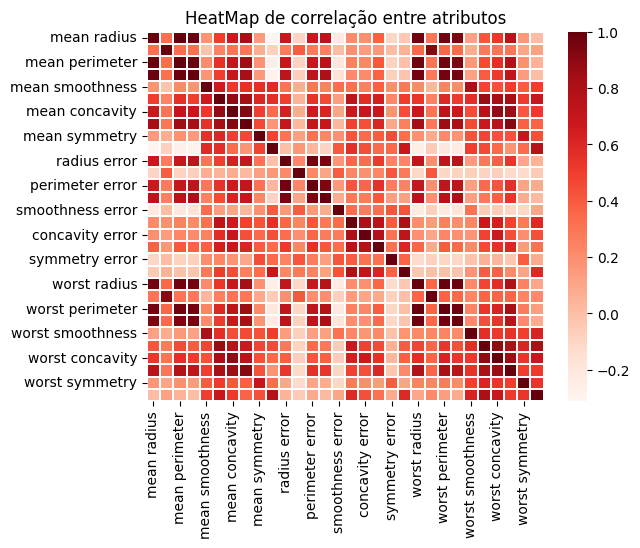

In [11]:
sns.heatmap(x.astype(float).corr(), linewidths=0.05, linecolor='white', cmap='Reds')
plt.title("HeatMap de correlação entre atributos")

In [12]:
sigma = 5
eta = 0.1
epocas = 500
random_seed = 1

neighbourhood_function = 'gaussian'
topology = "hexagonal"
nl = 10 # número de neurônios (linha)
nc = 7 # número de neurônios (coluna)

In [13]:
som = MiniSom(nl, nc, x.shape[1], sigma=sigma, learning_rate=eta,
             neighborhood_function=neighbourhood_function,
             random_seed=random_seed, topology=topology)
# som.pca_weights_init(x)
som.random_weights_init(x.values)
som.train_random(x.values, epocas)

In [14]:
som.quantization_error(x.values)

90.38726360967624

In [15]:
som.topographic_error(x.values)


0.25307557117750434

## Mapa de Distribuição das Classes

Aqui temos uma distribuição U-Matrix para visualização da distância entre os neurônios.

<function matplotlib.pyplot.show(close=None, block=None)>

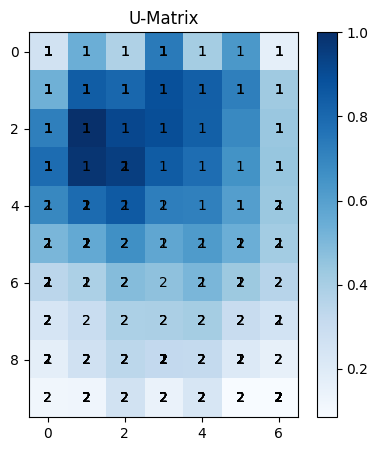

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.imshow(som.distance_map(), cmap='Blues')
plt.title('U-Matrix')
plt.colorbar()

for idx, xx in enumerate(x.values):
    w = som.winner(xx)
    plt.text(w[1], w[0], target[idx]+1, horizontalalignment='center', verticalalignment='center')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

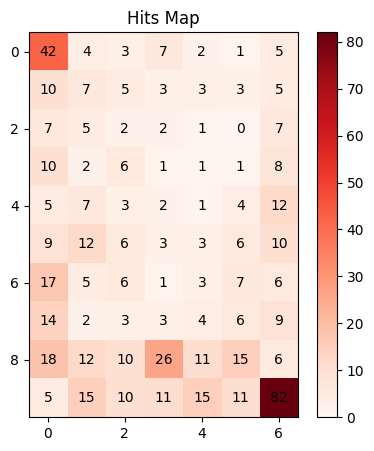

In [ ]:
hits = som.activation_response(x.values).astype(int)
plt.figure(figsize=(5,5),dpi=100)
plt.imshow(hits, cmap='Reds')
plt.title('Hits Map')
plt.colorbar()
for (i,j), value in np.ndenumerate(hits):
  plt.text(j, i, value, ha='center', va='center')
plt.show

##**4. Análise e Resultados**
<br>

### **Breast Cancer Wisconsin**

A U-Matrix gerada para o Breast Cancer Wisconsin (Figura X) revelou a formação de dois clusters principais, correspondentes às classes "malignant" e "benign". Áreas mais escuras na U-Matrix indicam fronteiras bem definidas entre os clusters, enquanto áreas mais claras sugerem regiões de transição.

O Hits Map (Figura Y) mostrou que a maioria das amostras está concentrada em poucos neurônios, indicando alta densidade nesses clusters. O erro de quantização foi de 90.39, e o erro topográfico foi de 0.25, sugerindo uma boa preservação da topologia dos dados.

Ao variar os parâmetros do modelo, observamos que o aumento do número de neurônios e do número de épocas resultou em uma redução do erro de quantização, mas também aumentou o tempo de treinamento. A taxa de aprendizado (eta) e o raio do vizinho (sigma) tiveram um impacto significativo na formação dos clusters, com valores menores de sigma resultando em clusters mais compactos.

<br>


### **Wine Dataset**

**U-Matrix:** Descrição e interpretação.

**Hits Map:** Análise dos clusters e outliers.

**Erros:** Discussão sobre o erro de quantização e o erro topográfico.

**Variação de Parâmetros:** Resultados e discussão.



---




##**5. Discussão**
<br>
Os resultados obtidos com a rede SOM mostraram-se promissores para a identificação de padrões em ambos os datasets. No Breast Cancer Wisconsin, a rede foi capaz de separar claramente as classes "malignant" e "benign", com clusters bem definidos na U-Matrix. Já no Wine Dataset, os três tipos de vinho foram agrupados de forma distinta, embora com alguma sobreposição em regiões de transição.

A variação dos parâmetros demonstrou que a escolha do tamanho do mapa e da taxa de aprendizado tem um impacto significativo na qualidade dos clusters. Valores menores de sigma e eta resultaram em clusters mais compactos, mas com um aumento no tempo de treinamento.

Uma limitação observada foi a dificuldade em identificar outliers, especialmente em datasets com alta dimensionalidade. Futuros trabalhos poderiam explorar técnicas complementares, como PCA (Principal Component Analysis), para reduzir a dimensionalidade antes da aplicação da rede SOM.

##**6. Conclusão**
<br>

Neste trabalho, aplicamos a rede SOM para análise de padrões em dois datasets: Breast Cancer Wisconsin e Wine Dataset. Os resultados demonstraram a eficácia da rede em identificar clusters e preservar a topologia dos dados, com destaque para a clara separação das classes no Breast Cancer Wisconsin.

A variação dos parâmetros mostrou que a escolha adequada do tamanho do mapa, da taxa de aprendizado e do número de épocas é crucial para o desempenho do modelo e para análise mais precisa dos gráficos gerados. Futuros trabalhos poderiam explorar a combinação da rede SOM com outras técnicas de redução de dimensionalidade, como PCA, visando a melhoria na identificação de outliers e na interpretação visual dos resultados.

##**7. Referências**
<br>


*   Sklearn Datasets: https://scikit-learn.org/stable/api/sklearn.datasets.html
*   Documentação MiniSom: https://github.com/JustGlowing/minisom
*   Univesp - Redes Neurais - A rede SOM aplicada ao problema de agrupamento de dados, Professor Marcos Quiles https://www.youtube.com/watch?v=ydrJ_p158dA&t=857s&ab_channel=UNIVESP


